# Test Technique - Alternance Data Scientist chez Rexel Groupe

**Candidat :** FONO Colince

**Sujet :** Analyse et Prévention du Churn pour TELCO Inc.

---

## Introduction

Ce notebook a été réalisé dans le cadre d'un test technique pour une alternance en Data Science chez Rexel Groupe. Le projet porte sur l'analyse des données clients de TELCO Inc., une entreprise de télécommunications, avec pour objectif principal de prédire la probabilité de churn (départ d'un client) et de proposer des stratégies pour retenir les clients. 

### Objectifs :
1. **Exploration et Préparation des Données :** 
   - Analyse exploratoire des données (EDA)
   - Traitement des données manquantes et encodage des variables catégorielles
   - Normalisation des variables numériques

2. **Modélisation :**
   - Création de modèles de prédiction du churn : régression logistique et forêt aléatoire (Random Forest)
   - Évaluation des performances des modèles

3. **Calcul des Réductions et Stratégie de Rétention :**
   - Modélisation mathématique pour calculer les réductions à proposer à chaque client
   - Détermination des clients à contacter pour maximiser le profit

4. **Résultat Final :**
   - Sauvegarde des résultats finaux dans un fichier CSV nommé `submission.csv` dans le dossier `resulats`.

---

## Pré-requis

Pour exécuter ce notebook correctement, assurez-vous d'avoir installé les bibliothèques Python nécessaires en exécutant la commande suivante :

```python
pip install pandas numpy matplotlib seaborn scikit-learn missingno
```



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
# Charger les données
data = pd.read_csv('C:/Users/user/Django/Churn_case_study/data/training.csv') #modification du chemain 
data.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,zero,660.000000,19995.0,0,0,897338.0,False,4,3,160.0,155,1,1.2,15,very_unsat,little,considering,STAY
1,C100001,one,317.647059,31477.0,155,15,393396.0,True,0,1,100.0,245,27,2.7,4,unsat,little,considering,LEAVE
2,C100006,zero,208.695652,66742.0,0,13,937197.0,False,4,2,127.0,493,20,2.6,4,avg,very_little,considering,STAY
3,C100008,zero,265.017668,40864.0,183,0,986430.0,False,3,3,86.0,390,13,2.5,12,unsat,very_high,considering,LEAVE
4,C100010,one,440.000000,43321.5,200,0,394622.0,True,2,3,77.0,175,18,2.4,10,very_unsat,little,actively_looking_into_it,LEAVE


## 1. Exploration des données (EDA - Exploratory Data Analysis)

#### Aperçu général des données

In [4]:
print(data.shape) 
print(data.info())  

(11981, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CUSTOMER_ID                  11981 non-null  object 
 1   COLLEGE                      11981 non-null  object 
 2   DATA                         11981 non-null  float64
 3   INCOME                       11981 non-null  float64
 4   OVERCHARGE                   11981 non-null  int64  
 5   LEFTOVER                     11981 non-null  int64  
 6   HOUSE                        11346 non-null  float64
 7   LESSTHAN600k                 11346 non-null  object 
 8   CHILD                        11981 non-null  int64  
 9   JOB_CLASS                    11981 non-null  int64  
 10  REVENUE                      11981 non-null  float64
 11  HANDSET_PRICE                11981 non-null  int64  
 12  OVER_15MINS_CALLS_PER_MONTH  11981 non-null  int64  
 13  TIME

In [5]:
print(data.describe())

               DATA         INCOME    OVERCHARGE      LEFTOVER          HOUSE  \
count  11981.000000   11981.000000  11981.000000  11981.000000   11346.000000   
mean     503.625376   47595.943703     80.185460     23.785577  506521.681650   
std      457.156513   22293.736749     84.587419     26.680037  256808.319571   
min        0.000000   10032.500000     -2.000000      0.000000  150015.000000   
25%      181.818182   29367.000000      0.000000      0.000000  268511.250000   
50%      360.995851   44992.500000     56.000000     15.000000  469775.500000   
75%      685.714286   65078.000000    171.000000     41.000000  722464.250000   
max     6600.000000  105355.500000    298.000000     89.000000  999996.000000   

              CHILD     JOB_CLASS       REVENUE  HANDSET_PRICE  \
count  11981.000000  11981.000000  11981.000000   11981.000000   
mean       2.070194      2.508639    155.541941     383.495868   
std        1.249974      1.120546     47.905580     210.601172   
min   

#### Distribution des variables catégorielles

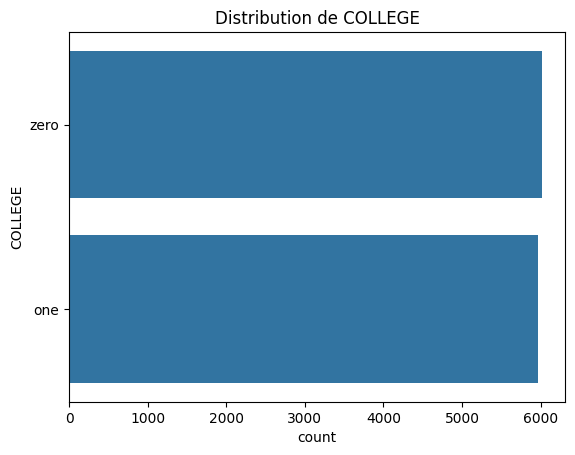

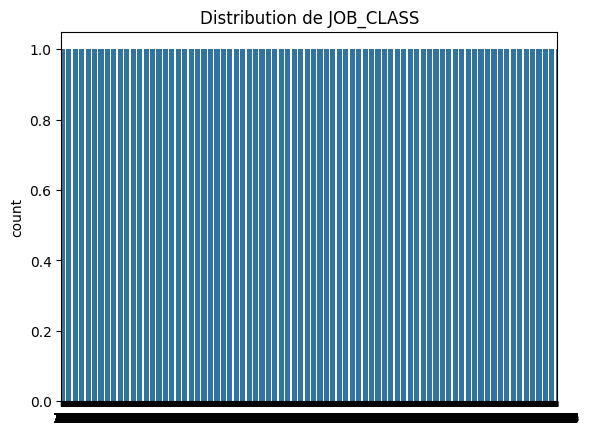

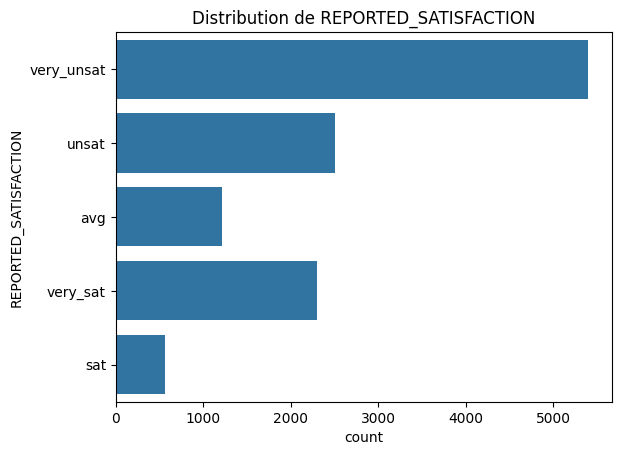

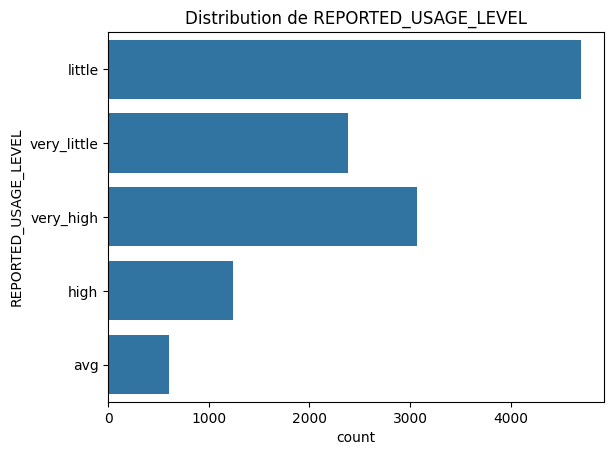

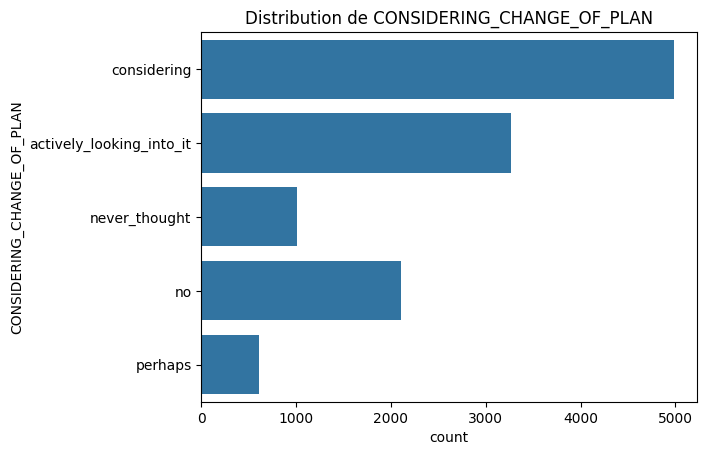

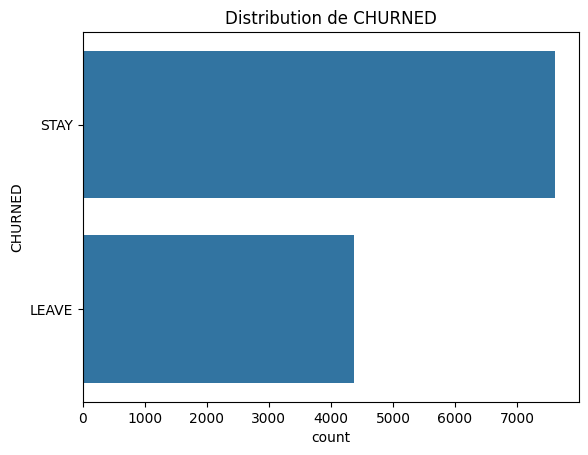

In [12]:
categorical_vars = ['COLLEGE', 'JOB_CLASS', 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN', 'CHURNED']
for var in categorical_vars:
    sns.countplot(data[var])
    plt.title(f"Distribution de {var}")
    plt.show()


#### Distribution des variables numériques

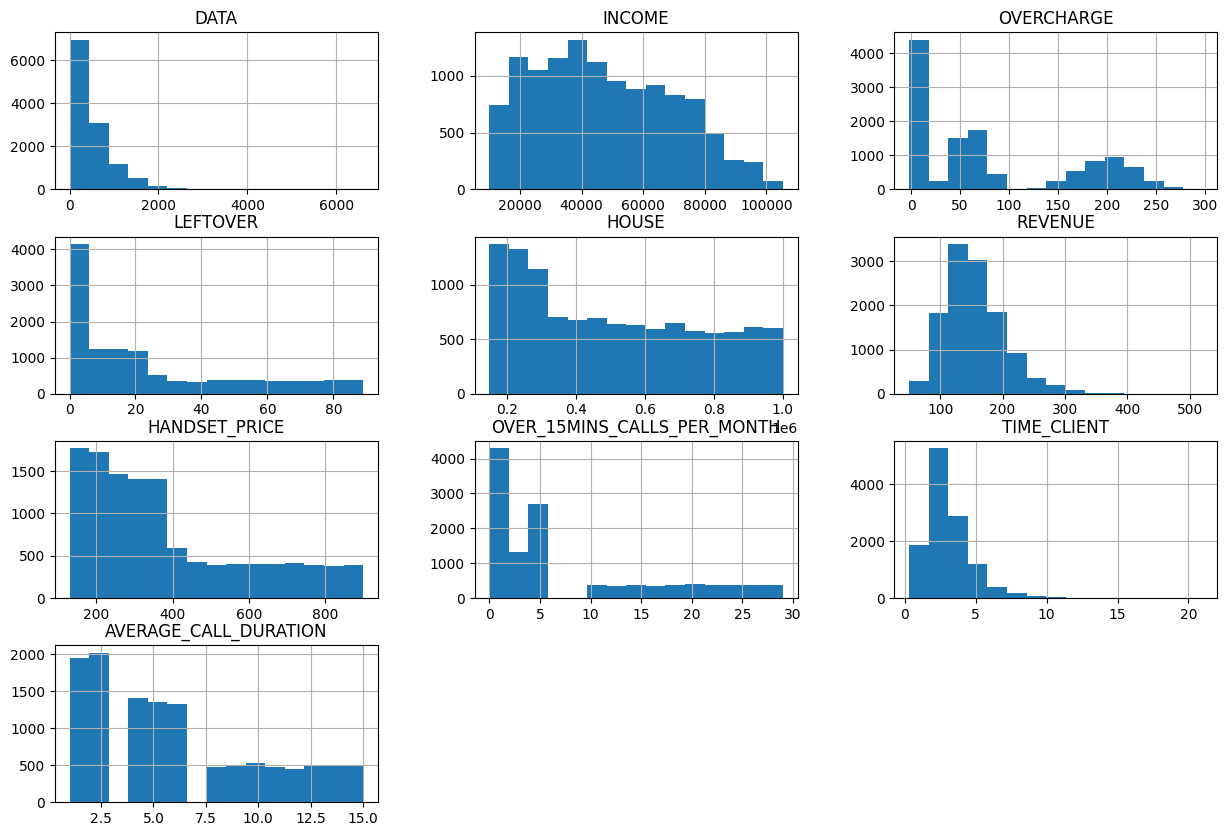

In [13]:
numeric_vars = ['DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER', 'HOUSE', 'REVENUE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'TIME_CLIENT', 'AVERAGE_CALL_DURATION']
data[numeric_vars].hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.show()

#### Visualisation des corrélations

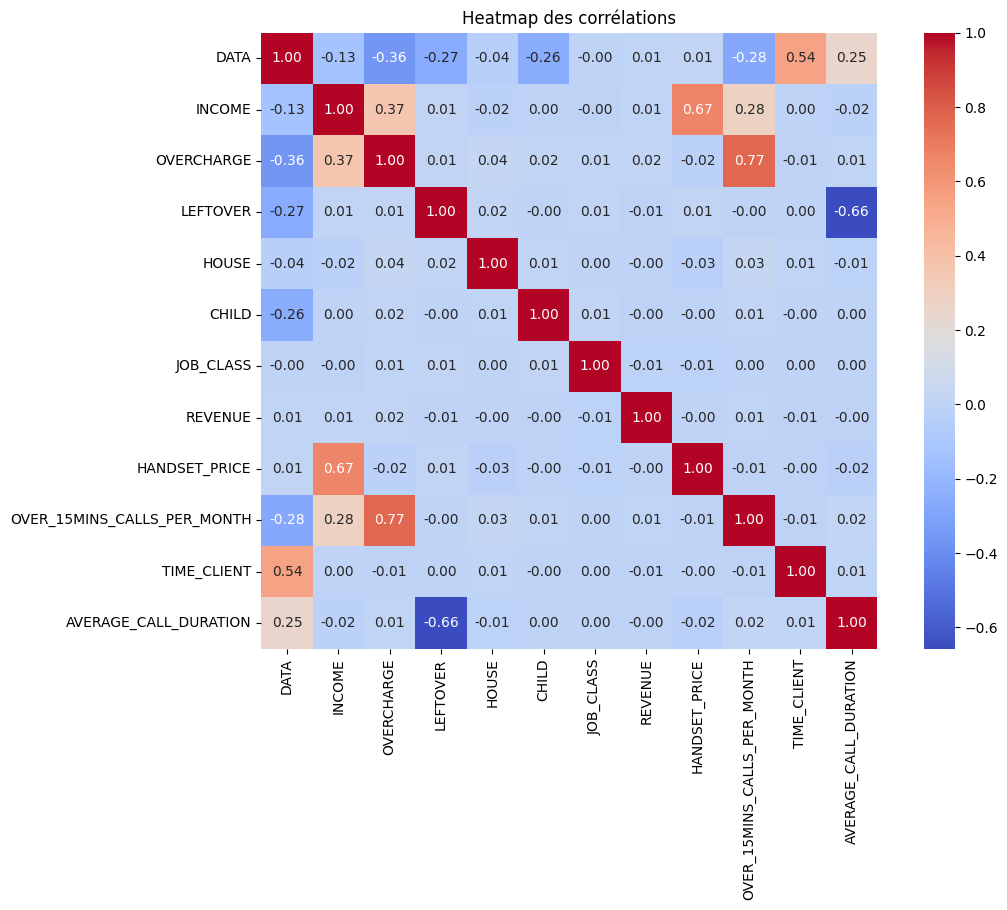

In [6]:
#  colonnes numériques
numeric_vars = data.select_dtypes(include=[np.number])

# Matrice de corrélation
corr_matrix = numeric_vars.corr()

# Heatmap des corrélations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Heatmap des corrélations")
plt.show()


#### Vérification des valeurs manquantes

In [7]:
missing_values = data.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)


Valeurs manquantes par colonne :
 CUSTOMER_ID                      0
COLLEGE                          0
DATA                             0
INCOME                           0
OVERCHARGE                       0
LEFTOVER                         0
HOUSE                          635
LESSTHAN600k                   635
CHILD                            0
JOB_CLASS                        0
REVENUE                          0
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
TIME_CLIENT                      0
AVERAGE_CALL_DURATION            0
REPORTED_SATISFACTION            0
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
CHURNED                          0
dtype: int64


#### Comparez la distribution des variables en fonction du churn

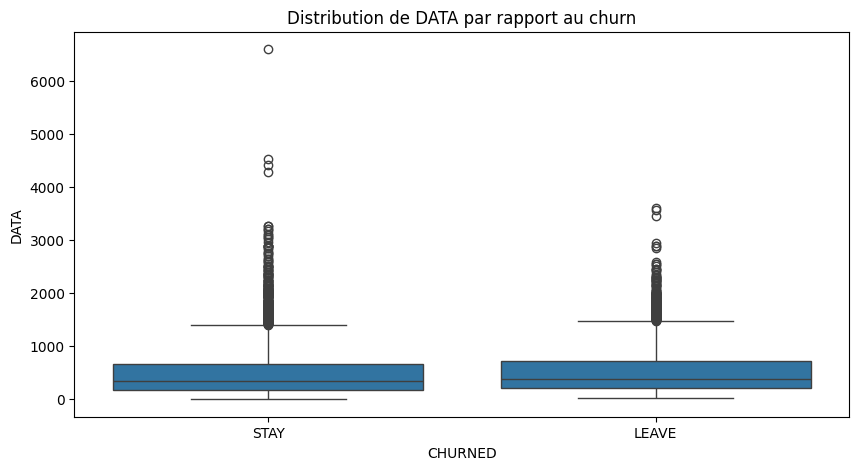

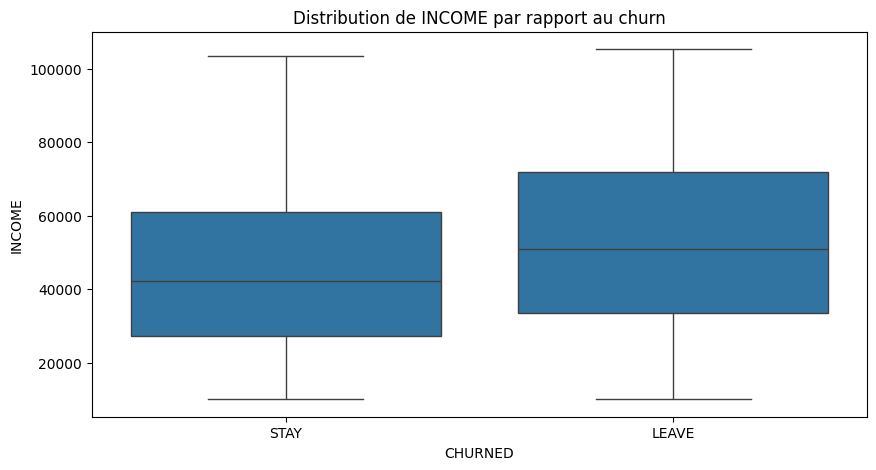

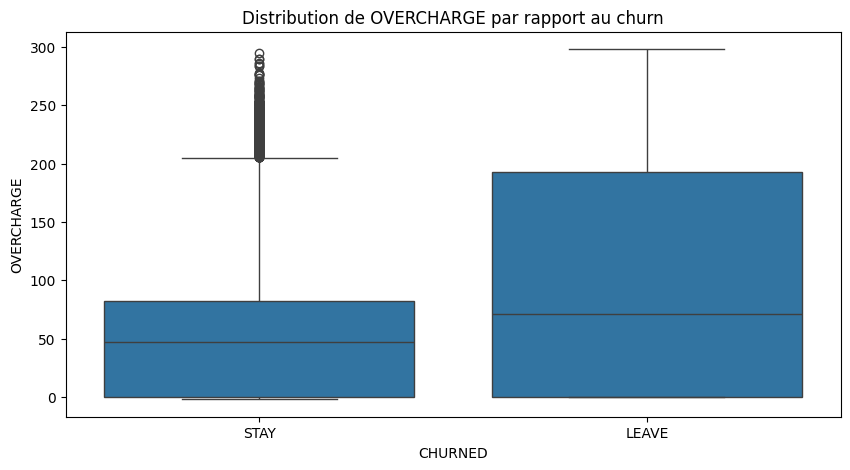

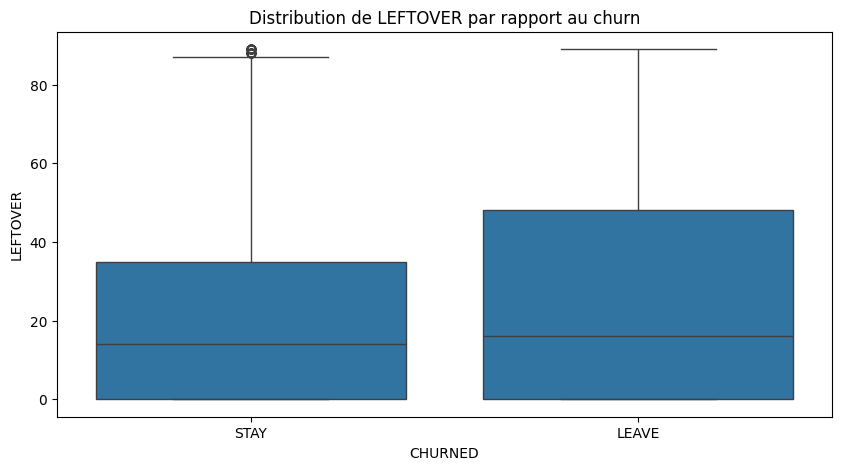

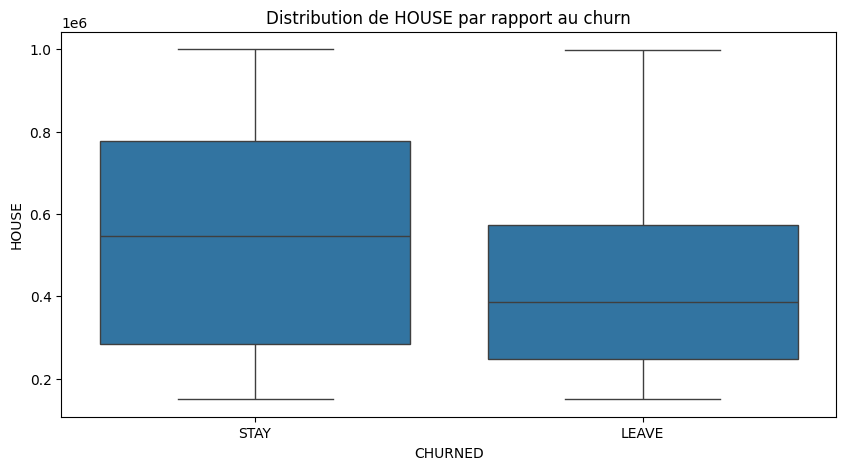

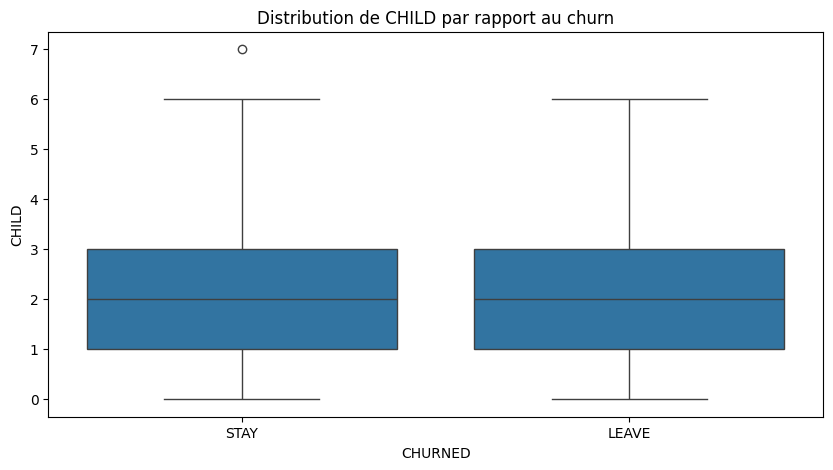

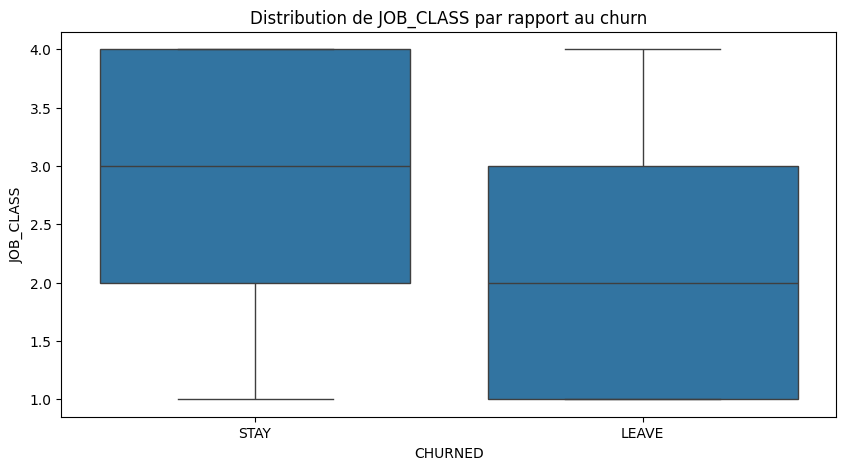

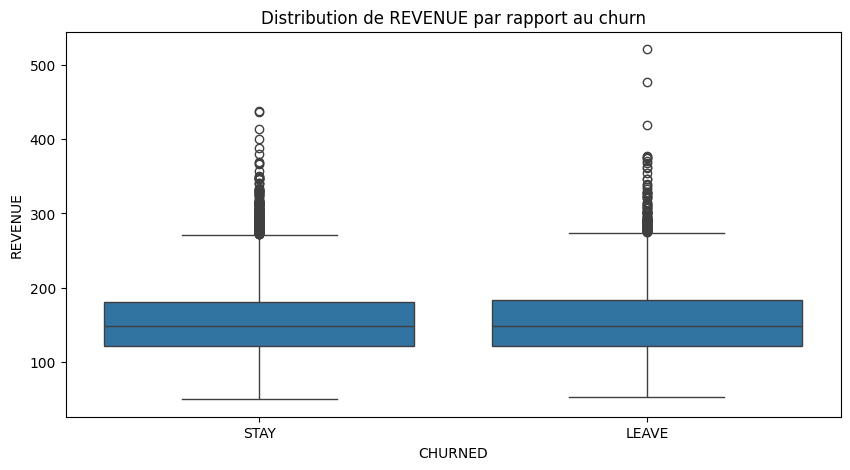

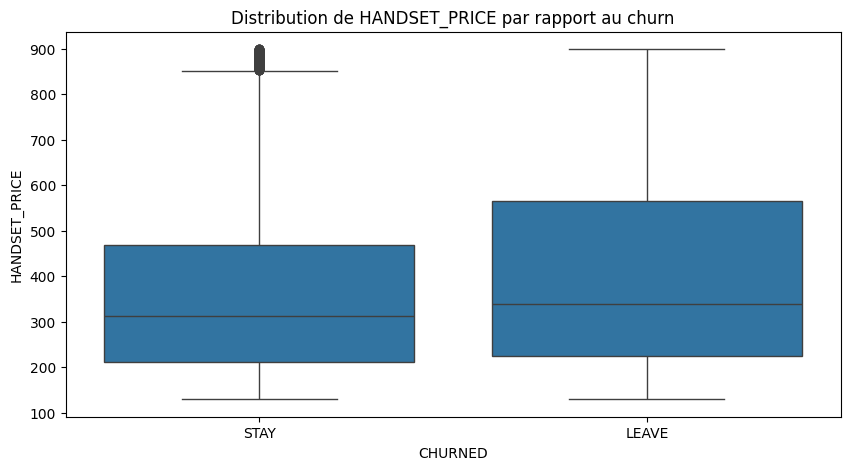

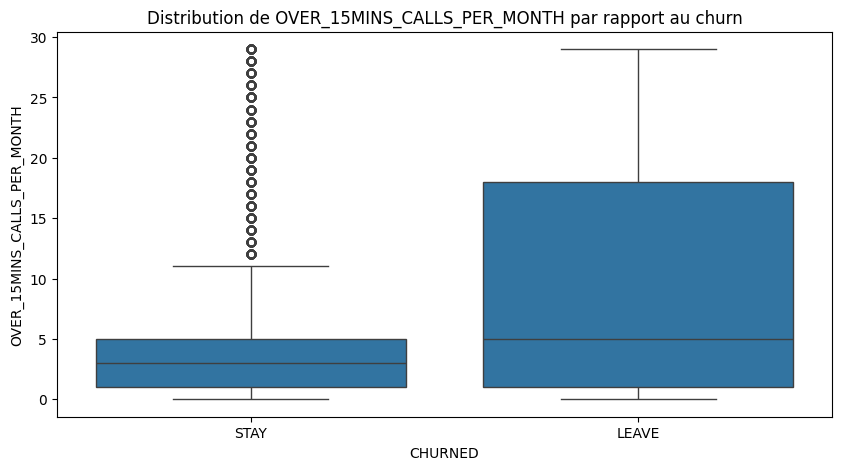

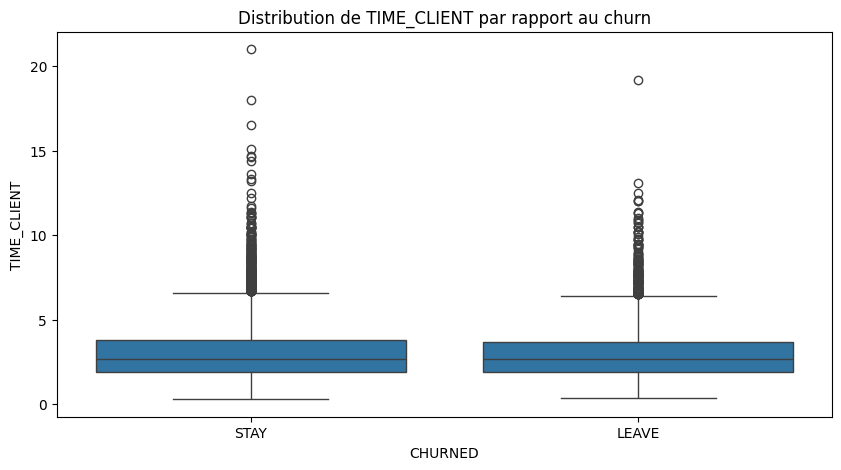

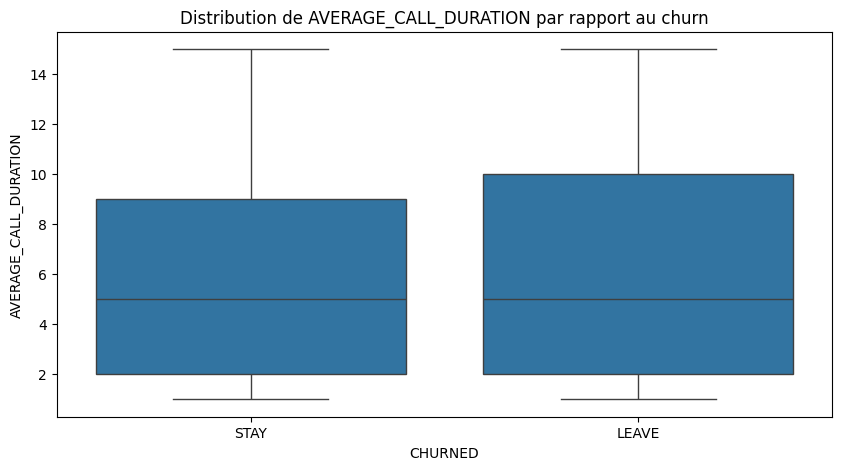

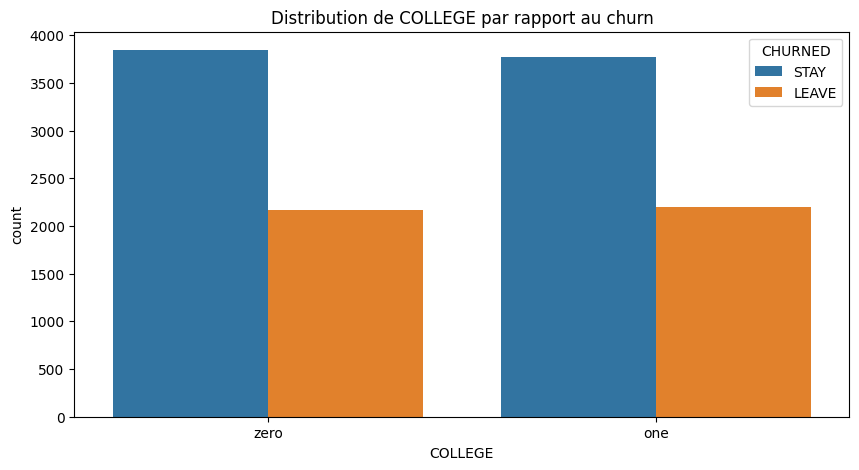

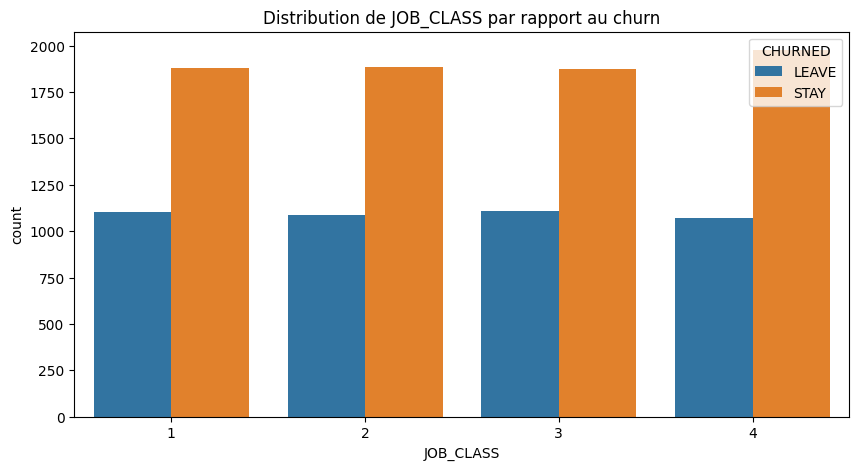

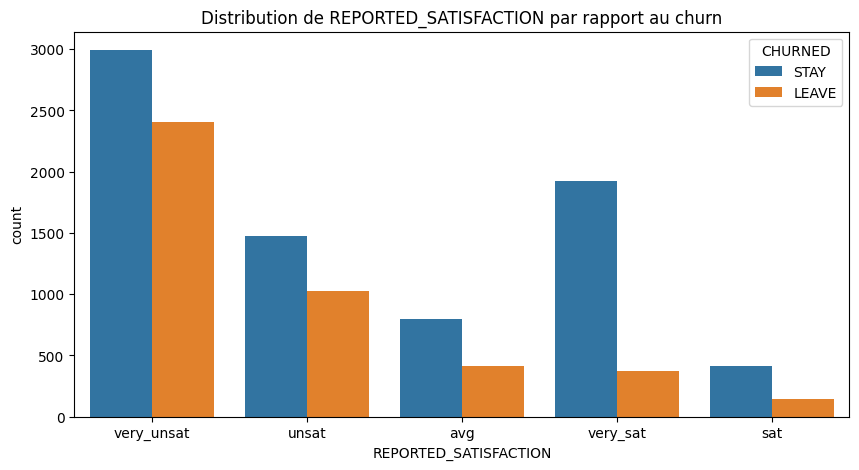

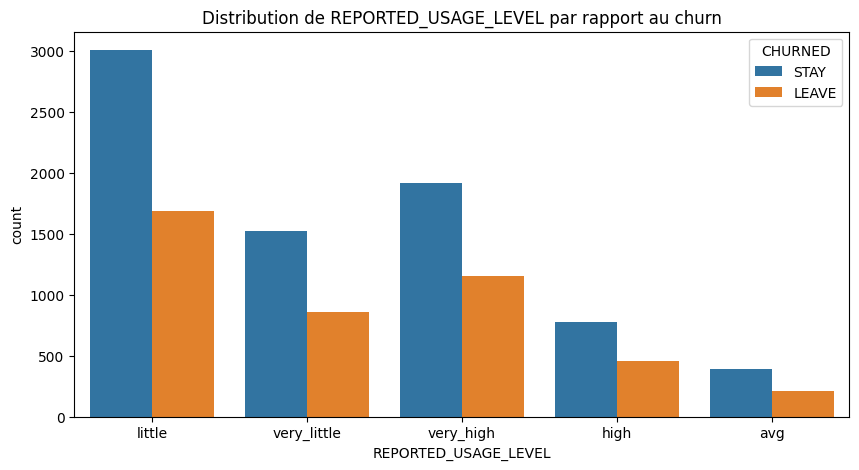

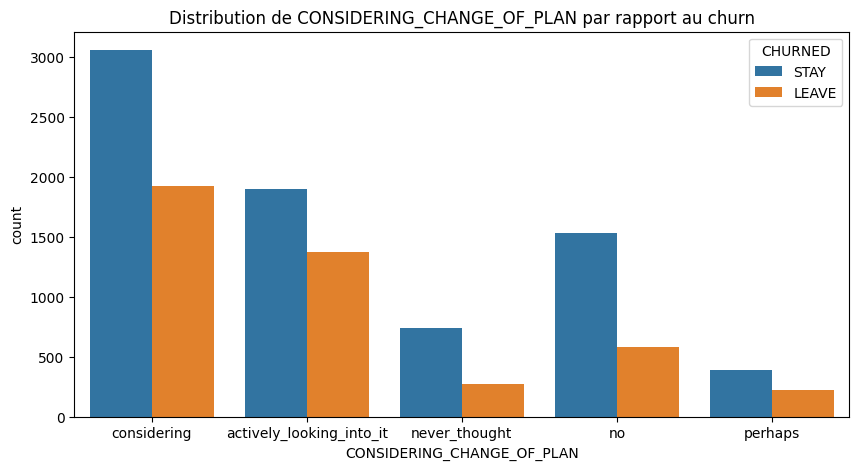

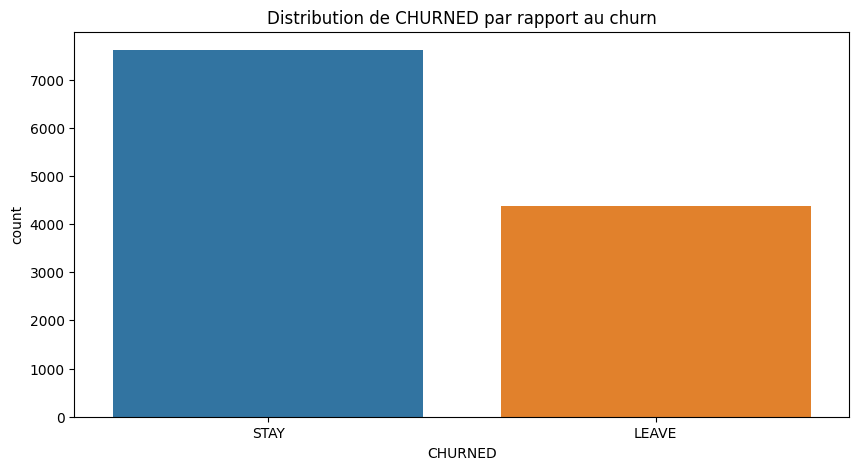

In [18]:
# Distribution des variables numériques en fonction du churned
for var in numeric_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='CHURNED', y=var, data=data)
    plt.title(f"Distribution de {var} par rapport au churn")
    plt.show()

# Distribution des variables catégorielles en fonction du churned
for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=var, hue='CHURNED', data=data)
    plt.title(f"Distribution de {var} par rapport au churn")
    plt.show()


## 2. Préparation des données


Traitez les valeurs manquantes, encodez les variables catégorielles, normalisez les variables numériques

#### 2.1 Gestion des valeurs manquantes

In [8]:
#pourcentages de valeurs manquantes

def missing(dataframe):
    missing_values = dataframe.isnull().sum()
    missing_percent = (missing_values/dataframe.shape[0])*100
    missing_table = pd.DataFrame({"Missing Values": missing_values, "Missing Percent": missing_percent})
    return missing_table



print(missing(data))

                             Missing Values  Missing Percent
CUSTOMER_ID                               0         0.000000
COLLEGE                                   0         0.000000
DATA                                      0         0.000000
INCOME                                    0         0.000000
OVERCHARGE                                0         0.000000
LEFTOVER                                  0         0.000000
HOUSE                                   635         5.300058
LESSTHAN600k                            635         5.300058
CHILD                                     0         0.000000
JOB_CLASS                                 0         0.000000
REVENUE                                   0         0.000000
HANDSET_PRICE                             0         0.000000
OVER_15MINS_CALLS_PER_MONTH               0         0.000000
TIME_CLIENT                               0         0.000000
AVERAGE_CALL_DURATION                     0         0.000000
REPORTED_SATISFACTION   

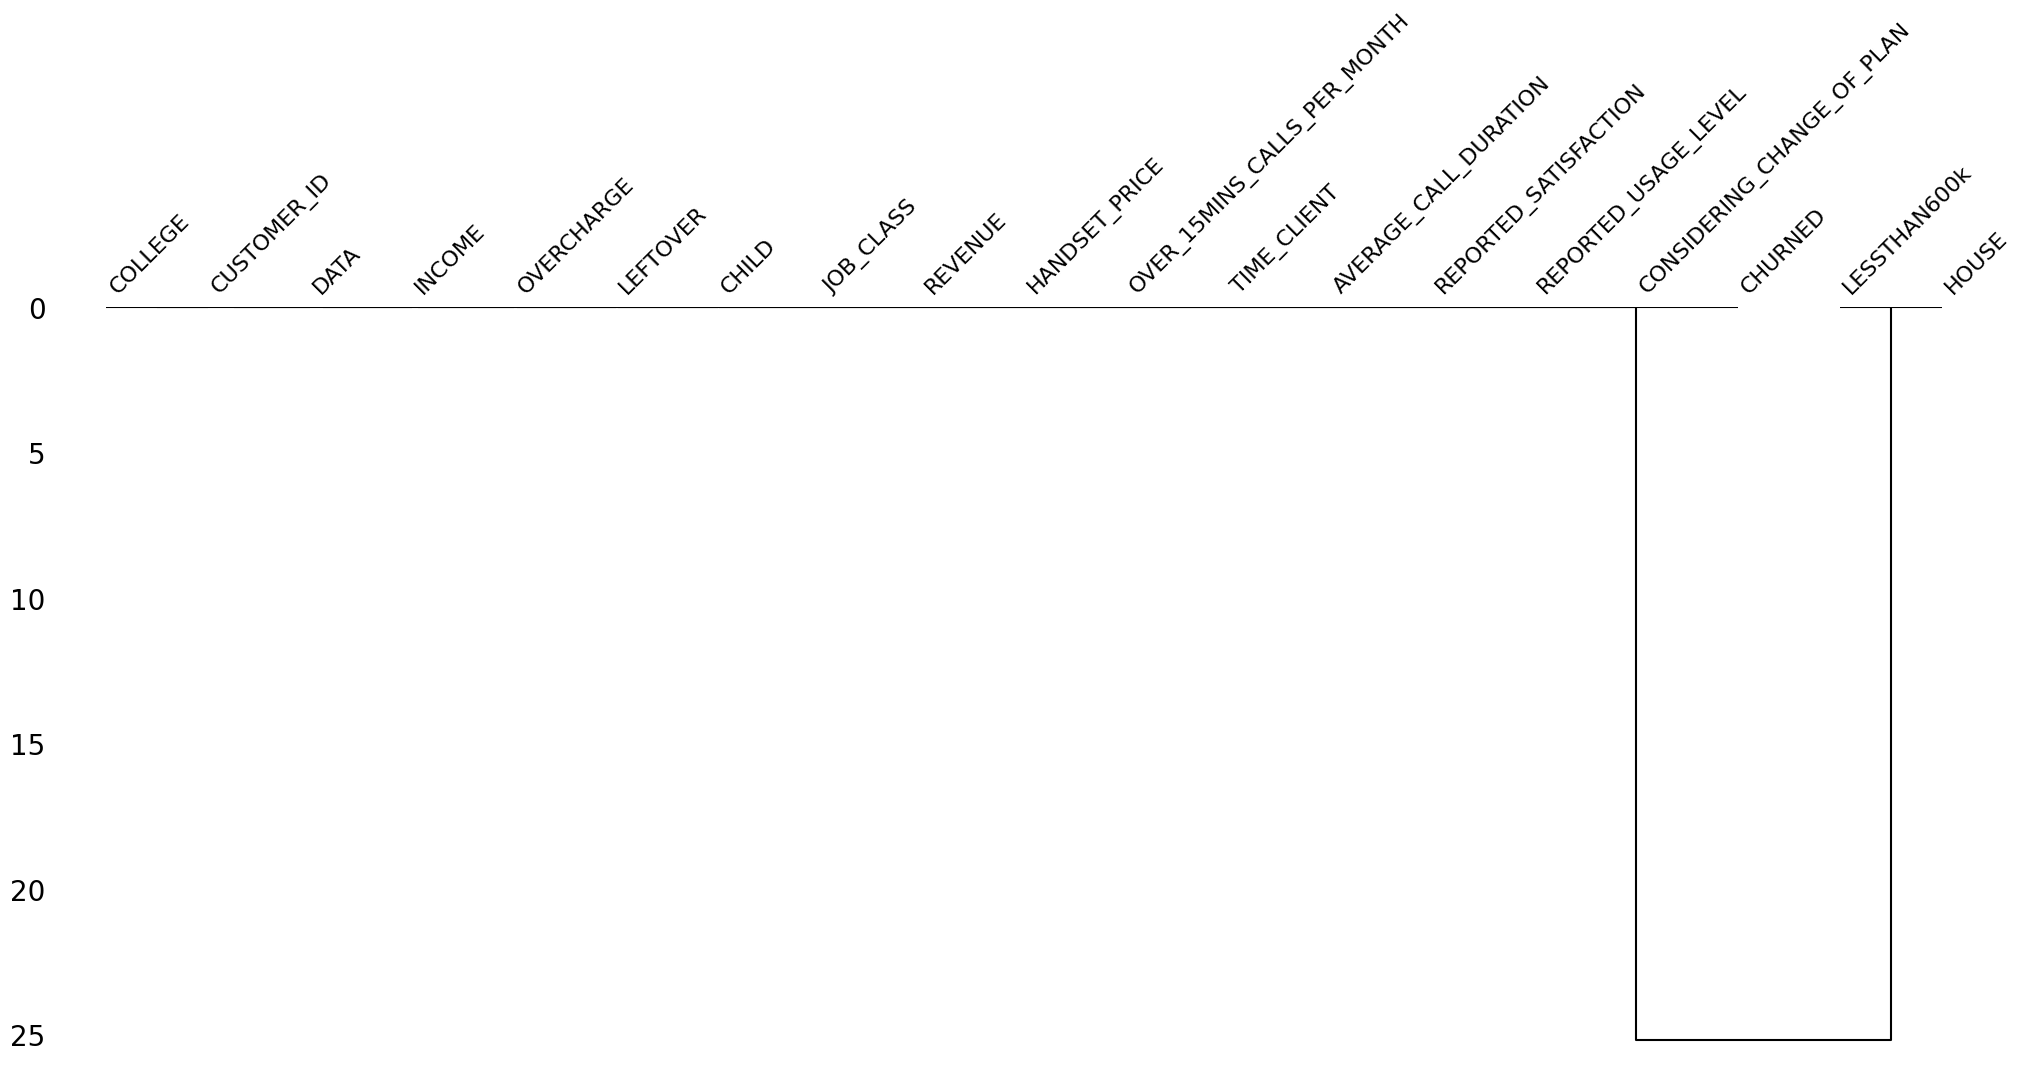

In [27]:
msno.dendrogram(data)
plt.show()

le pourcentage de valeurs manquantes et superieure a 5% et on remarque un lien entre les variables manquantes HOUSE et LESSTHAN600k

In [9]:
# Remplacer les valeurs manquantes de HOUSE par la médiane

def replace_missing_value(dataframe):
    house_median = dataframe['HOUSE'].median()
    dataframe['HOUSE'] = dataframe['HOUSE'].fillna(house_median)

    # Recalculer la colonne LESSTHAN600k en fonction de la colonne HOUSE
    dataframe['LESSTHAN600k'] = dataframe['HOUSE'] < 600000

    return dataframe


In [10]:
data = replace_missing_value(data)
print(missing(data))

                             Missing Values  Missing Percent
CUSTOMER_ID                               0              0.0
COLLEGE                                   0              0.0
DATA                                      0              0.0
INCOME                                    0              0.0
OVERCHARGE                                0              0.0
LEFTOVER                                  0              0.0
HOUSE                                     0              0.0
LESSTHAN600k                              0              0.0
CHILD                                     0              0.0
JOB_CLASS                                 0              0.0
REVENUE                                   0              0.0
HANDSET_PRICE                             0              0.0
OVER_15MINS_CALLS_PER_MONTH               0              0.0
TIME_CLIENT                               0              0.0
AVERAGE_CALL_DURATION                     0              0.0
REPORTED_SATISFACTION   

#### 2.2  encodez les variables catégorielles et normalisez les variables numériques

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [12]:
# Séparer les features et la cible
X = data.drop('CHURNED', axis=1)
y = data['CHURNED']

# Encoder les variables categoriques
categorical_features = [
    'COLLEGE', 'LESSTHAN600k', 'JOB_CLASS', 'REPORTED_SATISFACTION',
    'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN'
]

# Définir le préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [
            'DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER', 'HOUSE',
            'CHILD', 'REVENUE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH',
            'TIME_CLIENT', 'AVERAGE_CALL_DURATION'
        ]),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Encodage des étiquettes cibles
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Appliquer le préprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Vérifier les résultats
print(X_preprocessed.shape)
print(y_encoded)


(11981, 34)
[1 0 1 ... 0 1 1]


In [13]:
print(X_preprocessed)

[[ 0.34207355 -1.23810988 -0.94799922 ...  0.          0.
   0.        ]
 [-0.4068324  -0.72305583  0.88450107 ...  0.          0.
   0.        ]
 [-0.64516643  0.8588446  -0.94799922 ...  0.          0.
   0.        ]
 ...
 [-0.9266915   1.34924943 -0.94799922 ...  0.          0.
   0.        ]
 [-0.93155267 -0.44253934 -0.94799922 ...  0.          0.
   0.        ]
 [-0.67966285 -0.57096641 -0.557854   ...  0.          0.
   1.        ]]


## 3. Modélisation

### Régression Logistique

**Avantages :**
- Simple à comprendre et à implémenter.
- Efficace pour des problèmes de classification binaire.

**Inconvénients :**
- Peut ne pas capturer des relations complexes dans les données.

---

### Random Forest

**Avantages :**
- Gère bien les variables catégoriques et continues.
- Peut capturer des interactions complexes et est robuste face aux sur-ajustements.

**Inconvénients :**
- Moins interprétable que la régression logistique.

#### 3.1. Régression Logistique

ROC AUC Score: 0.7606533020535056
              precision    recall  f1-score   support

           0       0.66      0.49      0.56      1316
           1       0.74      0.85      0.79      2279

    accuracy                           0.72      3595
   macro avg       0.70      0.67      0.68      3595
weighted avg       0.71      0.72      0.71      3595



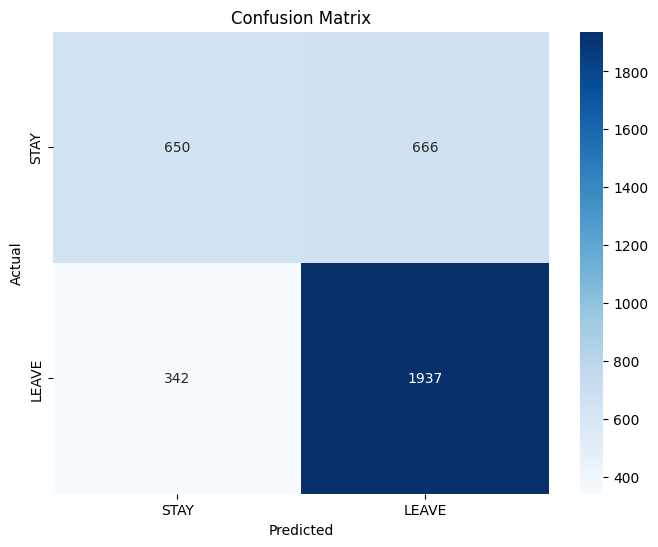

,Actual,Predicted,Churn Probability
0,LEAVE,STAY,0.722775
1,STAY,STAY,0.706054
2,STAY,LEAVE,0.299071
3,LEAVE,STAY,0.702860
4,STAY,STAY,0.868697
...,...,...,...
3590,STAY,STAY,0.909352
3591,STAY,LEAVE,0.425144
3592,STAY,STAY,0.813012
3593,STAY,STAY,0.835886


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_encoded, test_size=0.3, random_state=42)

# Initialiser et entraîner le modèle
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Faire des prédictions
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probabilités de churn
y_pred = log_reg.predict(X_test)

# Évaluer le modèle
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['STAY', 'LEAVE'], yticklabels=['STAY', 'LEAVE'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Comparaison entre les valeurs réelles et prédites
results = pd.DataFrame({
    'Actual': label_encoder.inverse_transform(y_test),
    'Predicted': label_encoder.inverse_transform(y_pred),
    'Churn Probability': y_pred_proba
})

results


#### 3.2 Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_encoded, test_size=0.3, random_state=42)

# Initialiser et entraîner le modèle
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Faire des prédictions
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Probabilités de churn
y_pred = rf.predict(X_test)

# Évaluer le modèle
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)
print(classification_report(y_test, y_pred))


ROC AUC Score: 0.8243715582075538
              precision    recall  f1-score   support

           0       0.71      0.59      0.65      1316
           1       0.79      0.86      0.82      2279

    accuracy                           0.76      3595
   macro avg       0.75      0.73      0.73      3595
weighted avg       0.76      0.76      0.76      3595



## 4. Préparation du Fichier CSV pour la Soumission

In [15]:
# Charger le jeu de données de test
validation = pd.read_csv('C:/Users/user/Django/Churn_case_study/data/validation.csv')

# Remplacer les valeurs manquantes de HOUSE par la médiane
validation = replace_missing_value(validation)
print(missing(validation))



                             Missing Values  Missing Percent
CUSTOMER_ID                               0              0.0
COLLEGE                                   0              0.0
DATA                                      0              0.0
INCOME                                    0              0.0
OVERCHARGE                                0              0.0
LEFTOVER                                  0              0.0
HOUSE                                     0              0.0
LESSTHAN600k                              0              0.0
CHILD                                     0              0.0
JOB_CLASS                                 0              0.0
REVENUE                                   0              0.0
HANDSET_PRICE                             0              0.0
OVER_15MINS_CALLS_PER_MONTH               0              0.0
TIME_CLIENT                               0              0.0
AVERAGE_CALL_DURATION                     0              0.0
REPORTED_SATISFACTION   

In [25]:
CUSTOMER_ID = validation['CUSTOMER_ID']
# Prétraiter les données de test
X_test_preprocessed = preprocessor.fit_transform(validation)

# Faire des prédictions sur les données de test
test_predictions_proba = log_reg.predict_proba(X_test_preprocessed)[:, 1]  # Utilisé le modèle au choix
y_predict = log_reg.predict(X_test_preprocessed)

# Préparer le fichier CSV
submission = pd.DataFrame({
    'CUSTOMER_ID': CUSTOMER_ID,
    'REVENUE': validation['REVENUE'],
    'CHURN_PROBABILITY': 1-test_predictions_proba, # la CHURN_PROBABILITY  est de 1- predictions_proba car predictions_proba est la probabilité de STAY
    'CHURN_LABEL':  label_encoder.inverse_transform(y_predict),
})


## 4.1. calcul du Discount


#### Modélisation Mathématique pour la Prévention du Churn chez TELCO Inc

#### Introduction
L'objectif de cette modélisation est de maximiser le profit futur de TELCO Inc. en déterminant les rabais à offrir à chaque client pour minimiser les risques de résiliation (churn). Cette approche prend en compte les coûts associés à la rétention des clients et l'impact des rabais sur la probabilité de churn.

#### Variables et Paramètres

- **$p_i$** : Probabilité initiale que le client $i$ résilie.
- **$r_i$** : Revenu annuel actuel du client $i$ sans remise.
- **$d_i$** : Rabais proposé au client  $i$ (en pourcentage du revenu).
- **$c$** : Coût fixe pour contacter un client (10€).
- **$\alpha$** : Coefficient représentant l'efficacité du rabais à réduire la probabilité de churn.
- **$\beta$** : Coefficient de pénalité pour le churn (reflète la perte liée à la résiliation d'un client).

#### Modélisation du Churn avec le Rabais
Nous modélisons l'impact d'un rabais $d_i$ sur la probabilité de churn $p_i$ à l'aide d'une fonction exponentielle. Cette fonction montre que l'impact initial du rabais est fort, mais qu'il diminue à mesure que le rabais augmente :

$
p_i(d_i) = p_i \times e^{-\alpha d_i}
$

Ici, $\alpha$ contrôle la sensibilité de la probabilité de churn au rabais.

#### Fonction de Profit Ajustée
Le profit attendu après avoir proposé un rabais $d_i$ à un client est modélisé comme suit :

$
\text{Profit}_i(d_i) = (1 - p_i(d_i)) \times (r_i \times (1 - d_i)) - c - \beta \times p_i(d_i) \times r_i
$

- $(1 - p_i(d_i)) \times (r_i \times (1 - d_i))$ : Revenu ajusté attendu du client après application du rabais et ajustement de la probabilité de churn.
- $c$ : Coût fixe pour contacter le client.
- $\beta \times p_i(d_i) \times r_i$ : Pénalité pour le churn, qui capture la perte liée à la résiliation.

#### Optimisation du Rabais
Pour chaque client, nous testons différents niveaux de rabais $d_i$ (de 0% à 100%) pour maximiser la fonction de profit. Le rabais optimal est celui qui maximise le profit attendu pour TELCO Inc.

#### Critère de Contact
Un client est sélectionné pour être contacté si :

- Le rabais optimal $d_i$ est supérieur à 0.
- Le profit attendu après optimisation est supérieur à 0.



In [77]:
# Définir les paramètres
alpha = 1.5  # Efficacité du rabais
beta = 0.5   # Pénalité pour le churn
cost = 10    # Coût de contact

# Fonction pour calculer la probabilité de churn avec le rabais
def churn_probability_with_discount(p_i_initial, d_i, alpha):
    return p_i_initial * np.exp(-alpha * d_i)

# Fonction pour calculer le profit avec un rabais
def calculate_profit_with_penalty(p_i_initial, r_i_actuel, d_i, alpha, beta, cost):
    p_i_discounted = churn_probability_with_discount(p_i_initial, d_i, alpha)
    profit = (1 - p_i_discounted) * (r_i_actuel * (1 - d_i)) - cost - beta * p_i_discounted * r_i_actuel
    return profit

# Calculer les profits attendus et déterminer les rabais optimaux
optimal_discounts = []
profits = []
customers_to_contact = []

for i, row in submission.iterrows():
    p_i_initial = row['CHURN_PROBABILITY']
    r_i_actuel = row['REVENUE']
    churn_label = row['CHURN_LABEL']


    # Tester plusieurs niveaux de rabais (0% à 100%)
    possible_discounts = np.linspace(0, 1, 31)
    profit_values = [calculate_profit_with_penalty(p_i_initial, r_i_actuel, d_i, alpha, beta, cost) for d_i in possible_discounts]
    
    # Trouver le rabais qui maximise le profit
    max_profit_index = np.argmax(profit_values)
    optimal_discount = possible_discounts[max_profit_index]
    max_profit = profit_values[max_profit_index]

    
    optimal_discounts.append(optimal_discount)
    profits.append(max_profit)

    # Déterminer si le client doit être contacté
    customers_to_contact.append('YES' if optimal_discount > 0  and max_profit > 0 else 'NO')

# Ajouter les résultats au DataFrame original
submission['DISCOUNT'] = optimal_discounts
submission['Expected_Profit'] = profits
submission['CLIENT_TO_CONTACT'] = customers_to_contact


In [78]:
submission.head()

,CUSTOMER_ID,REVENUE,CHURN_PROBABILITY,CHURN_LABEL,DISCOUNT,Expected_Profit,CLIENT_TO_CONTACT
0,C100002,149.0,0.521127,LEAVE,0.266667,35.072898,YES
1,C100003,176.0,0.477023,STAY,0.233333,49.993767,YES
2,C100004,124.0,0.104349,STAY,0.000000,94.591100,NO
3,C100005,279.0,0.157033,STAY,0.000000,203.281879,NO
4,C100007,128.0,0.043539,STAY,0.000000,109.640562,NO


In [79]:
resultat = submission.drop(columns=['Expected_Profit', 'REVENUE'])

# Enregistrer en CSV sans les colonnes exclues
resultat.to_csv('C:/Users/user/Django/Churn_case_study/resultats/submission.csv', index=False)


## Distribution des données du resultat

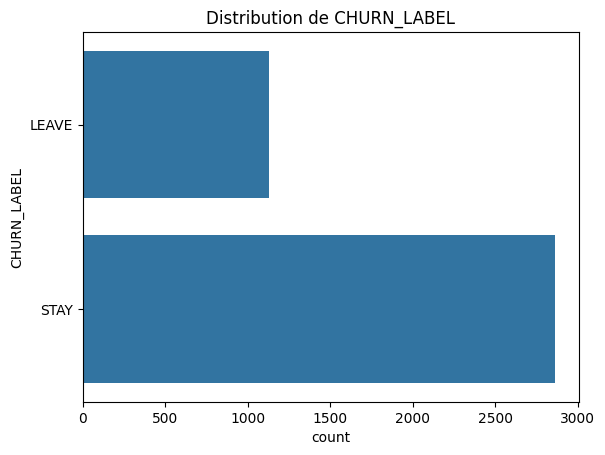

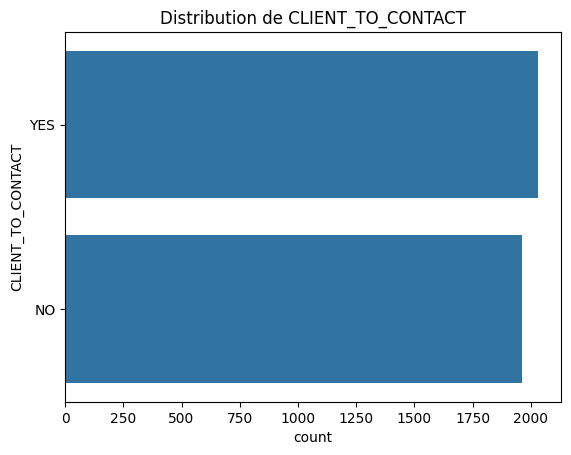

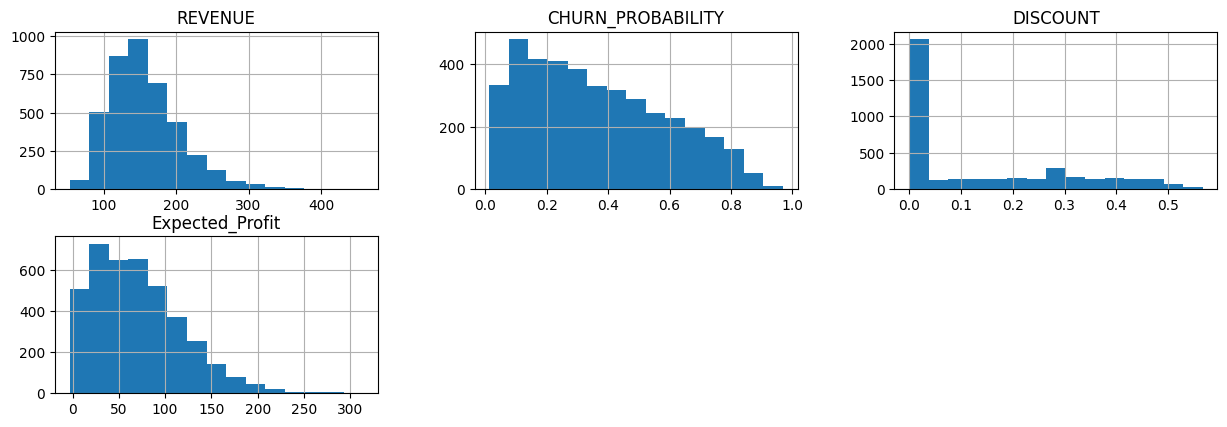

In [80]:
cat_vars = ['CHURN_LABEL', 'CLIENT_TO_CONTACT']
for var in cat_vars:
    sns.countplot(submission[var])
    plt.title(f"Distribution de {var}")
    plt.show()

numerical_vars = ['REVENUE', 'CHURN_PROBABILITY', 'DISCOUNT', 'Expected_Profit']
submission[numerical_vars].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.show()

Je vous remercie de l'attention portée à mon travail, et je reste disponible pour toute question ou clarification supplémentaire.